In [2]:
import pandas as pd


## leemos el archivo output_steam_games.json
df_steam_games= pd.read_csv('csv/steam_games.csv')


df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22529 entries, 0 to 22528
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genero            22529 non-null  object 
 1   app_name          22529 non-null  object 
 2   titulo            22529 non-null  object 
 3   anio_lanzamiento  22495 non-null  float64
 4   precio            22529 non-null  float64
 5   id_contenido      22529 non-null  int64  
 6   desarrollador     22529 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ MB


In [3]:
df_steam_games.describe()


,anio_lanzamiento,precio,id_contenido
count,22495.000000,22529.000000,2.252900e+04
mean,2014.671260,8.965943,4.307083e+05
std,3.515933,15.414846,1.918428e+05
min,1983.000000,0.000000,1.000000e+01
25%,2014.000000,2.990000,3.022900e+05
50%,2016.000000,4.990000,4.269280e+05
75%,2017.000000,9.990000,5.807000e+05
max,2021.000000,995.000000,2.028850e+06


In [4]:
df_steam_games.nunique()

genero                804
app_name            22513
titulo              22513
anio_lanzamiento       38
precio                121
id_contenido        22529
desarrollador       10275
dtype: int64

Visualización de la distribución de los años de lanzamiento utilizando un histograma o un gráfico de barras:

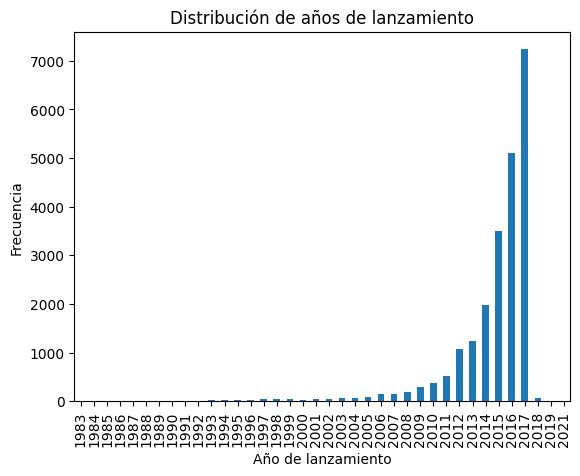

In [7]:
df_steam_games['anio_lanzamiento'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de años de lanzamiento')
plt.show()


In [10]:
# Calcula el rango intercuartílico (IQR)
Q1 = df_steam_games['precio'].quantile(0.25)
Q3 = df_steam_games['precio'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identifica outliers
outliers = df_steam_games[(df_steam_games['precio'] < limite_inferior) | (df_steam_games['precio'] > limite_superior)]



Outliers en la columna 'precio':
                                                  genero   
6      ['Free to Play', 'Indie', 'Simulation', 'Sports']  \
13     ['Free to Play', 'Indie', 'Simulation', 'Sports']   
35                                            ['Racing']   
199                     ['Massively Multiplayer', 'RPG']   
267                                       ['Simulation']   
...                                                  ...   
22265                                         ['Racing']   
22280                                         ['Racing']   
22398                              ['RPG', 'Simulation']   
22409  ['Massively Multiplayer', 'Racing', 'Simulatio...   
22490  ['Action', 'Adventure', 'Casual', 'Indie', 'Si...   

                                                app_name   
6                          SNOW - All Access Legend Pass  \
13                                  SNOW - Lifetime Pack   
35                                  RACE - The WTCC Game   
199   

verificacion de outliers en la columna precio

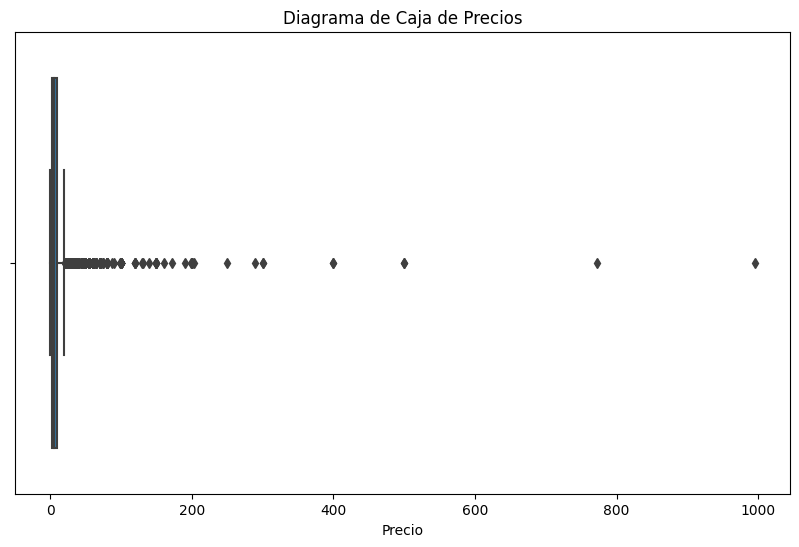

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea el diagrama de caja
plt.figure(figsize=(10,6))
sns.boxplot(x=df_steam_games['precio'])
plt.title('Diagrama de Caja de Precios')
plt.xlabel('Precio')
plt.show()


nube de palabras para generos

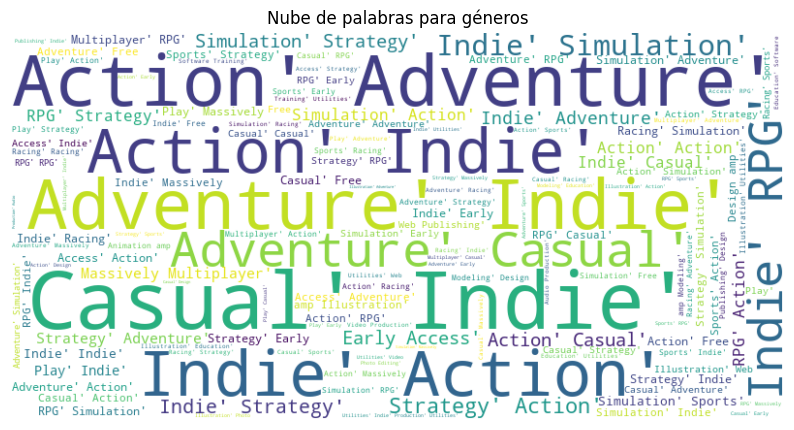

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todos los géneros en una sola cadena
todos_generos = ' '.join(df_steam_games['genero'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(todos_generos)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para géneros')
plt.show()


Visualización de la relación entre dos variables utilizando un gráfico de dispersión:

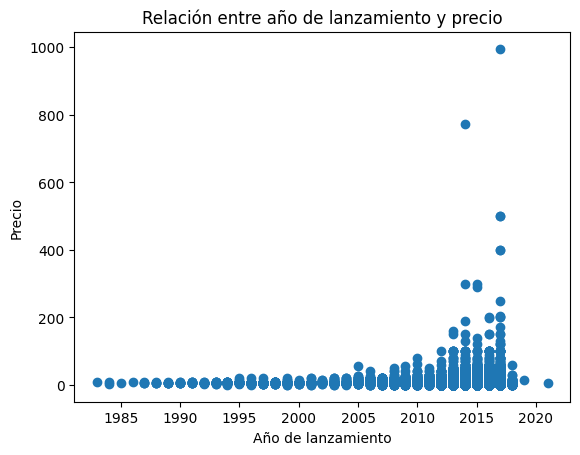

In [12]:
plt.scatter(df_steam_games['anio_lanzamiento'], df_steam_games['precio'])
plt.xlabel('Año de lanzamiento')
plt.ylabel('Precio')
plt.title('Relación entre año de lanzamiento y precio')
plt.show()
